In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage, misc
import tensorflow as tf
N='228'
a=Image.open('/Users/sofiadunlosky/Downloads/ilovepdf_images-extracted/img'+N+'.jpg')

In [2]:
Name=os.listdir('/Users/sofiadunlosky/Downloads/ilovepdf_images-extracted/pic3/')
Name


['img212.jpg',
 'img220.jpg',
 'img228.jpg',
 'img236.jpg',
 'img244.jpg',
 'img252.jpg',
 'img260.jpg',
 'img268.jpg',
 'img276.jpg',
 'img284.jpg',
 'img292.jpg',
 'img300.jpg',
 'img311.jpg',
 'img319.jpg',
 'img327.jpg',
 'img335.jpg',
 'img343.jpg',
 'img351.jpg',
 'img359.jpg',
 'img367.jpg',
 'img375.jpg',
 'img383.jpg',
 'img391.jpg',
 'img399.jpg',
 'img410.jpg',
 'img418.jpg',
 'img426.jpg',
 'img434.jpg',
 'img442.jpg',
 'img450.jpg',
 'img458.jpg',
 'img466.jpg',
 'img474.jpg',
 'img482.jpg',
 'img490.jpg',
 'img498.jpg']

In [177]:
import imagenet.classify_image as classify

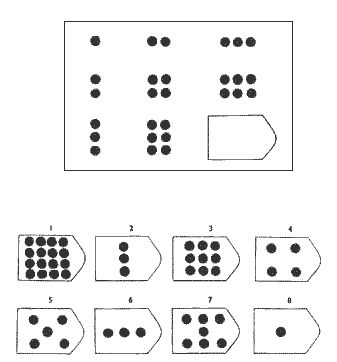

In [178]:
a

In [792]:
pic1

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 252, 252, 168, 236,  87,  86, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 253, 153, 228, 107,  95, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 254, 253, 142, 144, 120, 217, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 255,
        254, 255, 253, 213,  80,  77, 129, 241, 255, 254, 255, 255, 253,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 249, 252, 252,
        227, 171, 115, 122,  90, 193, 113, 121, 174, 248, 250, 251, 253,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 250, 251, 220,
         91,  69, 107, 231, 242, 253, 247, 200, 142, 188, 230, 251, 253,
        254, 255],
       [25

In [798]:
data=np.load('data.npy')

pic1=data[:,:,0,0].reshape(28,28)
pic1

array([[255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 254., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 254., 253., 252., 252.,
        255., 253., 253., 255., 252., 251., 253., 253., 255., 253., 255.,
        254., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255

/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


dtype('uint8')

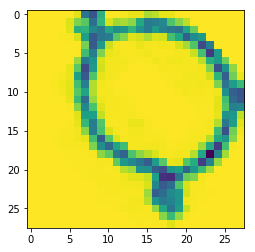

In [799]:
pic1=misc.imresize(np.array(a)[35:75,81:123,:], (28, 28))[:,:,0]
# data=np.load('data.npy')

# pic1=data[:,:,0,0].reshape(28,28)
pic2=get_img_rot_broa(pic1, degree=45, filled_color=[255,255,255])
plt.imshow(pic2[6:34,6:34])
pic2[6:34,6:34].shape
pic1.dtype

In [786]:
import cv2
from math import fabs, sin, cos, radians
import numpy as np
from scipy.stats import mode


def get_img_rot_broa(img, degree=45, filled_color=-1):
    """
    Desciption:
            Get img rotated a certain degree,
        and use some color to fill 4 corners of the new img.
    """

    # 获取旋转后4角的填充色
    if filled_color == -1:
        filled_color = mode([img[0, 0], img[0, -1],
                             img[-1, 0], img[-1, -1]]).mode[0]
    if np.array(filled_color).shape[0] == 2:
        if isinstance(filled_color, int):
            filled_color = (filled_color, filled_color, filled_color)
    else:
        filled_color = tuple([int(i) for i in filled_color])

    height, width = img.shape[:2]

    # 旋转后的尺寸
    height_new = int(width * fabs(sin(radians(degree))) +
                     height * fabs(cos(radians(degree))))
    width_new = int(height * fabs(sin(radians(degree))) +
                    width * fabs(cos(radians(degree))))

    mat_rotation = cv2.getRotationMatrix2D((width / 2, height / 2), degree, 1)

    mat_rotation[0, 2] += (width_new - width) / 2
    mat_rotation[1, 2] += (height_new - height) / 2

    # Pay attention to the type of elements of filler_color, which should be
    # the int in pure python, instead of those in numpy.
    img_rotated = cv2.warpAffine(img, mat_rotation, (width_new, height_new),
                                 borderValue=filled_color)
    # 填充四个角
    mask = np.zeros((height_new + 2, width_new + 2), np.uint8)
    mask[:] = 0
    seed_points = [(0, 0), (0, height_new - 1), (width_new - 1, 0),
                   (width_new - 1, height_new - 1)]
    for i in seed_points:
        cv2.floodFill(img_rotated, mask, i, filled_color)

    return img_rotated


In [794]:
type(pic1)

numpy.ndarray

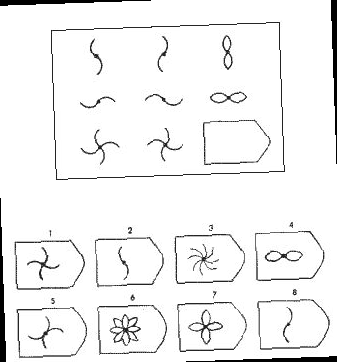

In [6]:
a.rotate(2)

In [181]:
pic[:,:,0]=misc.imresize(np.array(a)[37+1:78+1,81+1:123+2,:], (28, 28))[:,:,0]

/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


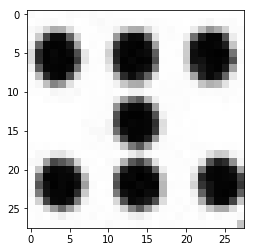

In [324]:
p=misc.imresize(np.array(a)[311-n:353-n,181-n:228-n,:], (28, 28))[:,:,0]
plt.imshow(p,cmap='gray')

In [371]:
a

'/Users/sofiadunlosky/Downloads/ilovepdf_images-extracted/pic3/img212.jpg'

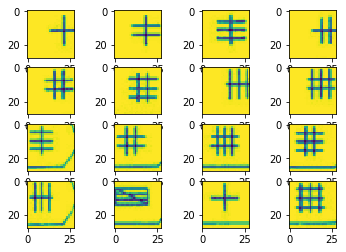

In [381]:
for j in range (0,16):
    plt.subplot(4,4,j+1)
    plt.imshow(data[:,:,j,3])

In [375]:
np.save('data.npy',data)

In [372]:
data=np.zeros((28,28,16,len(Name)))
for i in range (len(Name)):
    a=Image.open('/Users/sofiadunlosky/Downloads/ilovepdf_images-extracted/pic3/'+str(Name[i]))
    data[:,:,:,i]=cutpic(a)

/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """
/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  
/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys
/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`

/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':
/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # Remove the CWD from sys.path while we load stuff.
/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # This is added back by InteractiveShellApp.init_path()
/Users/sofiadunlosky

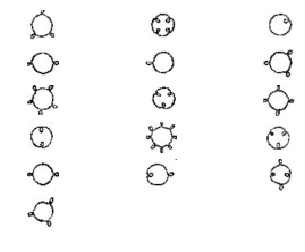

In [783]:
##### pic=np.zeros((28,28,16))
def cutpic(a):
    n=3
    m=0
    m1=-8
    m2=0
    m3=0
    pic=np.zeros((28,28,16))
    pic[:,:,0]=misc.imresize(np.array(a)[37-n:79-n,81-m1:123-m1,:], (28, 28))[:,:,0]
    pic[:,:,3]=misc.imresize(np.array(a)[81-n:123-n,81-m1:123-m1,:], (28, 28))[:,:,0]
    pic[:,:,6]=misc.imresize(np.array(a)[127-n:169-n,81-m1:123-m1,:], (28, 28))[:,:,0]
    pic[:,:,2]=misc.imresize(np.array(a)[37-n:79-n,209-m2:254-m2,:], (28, 28))[:,:,0]
    #pic[:,:,3]=misc.imresize(np.array(a)[81-n:123-n,79-m1:125-m1,:], (28, 28))[:,:,0]
    #pic[:,:,0]=misc.imresize(np.array(a)[37-n:79-n,81-m:130-m,:], (28, 28))[:,:,0]
    #pic[:,:,3]=misc.imresize(np.array(a)[81-n:123-n,81-m:130-m,:], (28, 28))[:,:,0]
    #pic[:,:,6]=misc.imresize(np.array(a)[127-n:169-n,79-m2:129-m2,:], (28, 28))[:,:,0]
    pic[:,:,1]=misc.imresize(np.array(a)[37-n:79-n,147-m:189-m,:], (28, 28))[:,:,0]
    pic[:,:,4]=misc.imresize(np.array(a)[81-n:123-n,147-m:189-m,:], (28, 28))[:,:,0]
    pic[:,:,7]=misc.imresize(np.array(a)[127-n:169-n,147-m:189-m,:], (28, 28))[:,:,0]
    pic[:,:,2]=misc.imresize(np.array(a)[37-n:79-n,212-m2:254-m2,:], (28, 28))[:,:,0]
    #pic[:,:,2]=misc.imresize(np.array(a)[37-n:79-n,210-m2:258-m2,:], (28, 28))[:,:,0]
    pic[:,:,5]=misc.imresize(np.array(a)[81-n:123-n,212-m3:254-m3,:], (28, 28))[:,:,0]
    n=10
    n1=9
    n2=12
    n3=8
    m=-2
    m1=2
    m2=0
    m3=-9
    m4=-14
    pic[:,:,8]=misc.imresize(np.array(a)[239-n:281-n,22-m1:64-m1,:], (28, 28))[:,:,0]
    #pic[:,:,8]=misc.imresize(np.array(a)[239-n1:285-n1,22-m5:70-m5,:], (28, 28))[:,:,0]
    pic[:,:,9]=misc.imresize(np.array(a)[239-n:281-n,104-m1:146-m1,:], (28, 28))[:,:,0]
    #pic[:,:,9]=misc.imresize(np.array(a)[239-n:281-n,102-m1:148-m1,:], (28, 28))[:,:,0]
    pic[:,:,10]=misc.imresize(np.array(a)[239-n:281-n,184-m:226-m,:], (28, 28))[:,:,0]
    pic[:,:,11]=misc.imresize(np.array(a)[239-n2:281-n2,267-m:309-m,:], (28, 28))[:,:,0]
    pic[:,:,12]=misc.imresize(np.array(a)[311-n3:353-n3,22-m1:64-m1,:], (28, 28))[:,:,0]
    pic[:,:,13]=misc.imresize(np.array(a)[311-n1:353-n1,104-m:146-m,:], (28, 28))[:,:,0]
    pic[:,:,14]=misc.imresize(np.array(a)[311-n1:353-n1,184-m:226-m,:], (28, 28))[:,:,0]
    pic[:,:,15]=misc.imresize(np.array(a)[311-n:353-n,267-m:309-m,:], (28, 28))[:,:,0]
    return pic
#data=np.zeros((28,28,16,len(Name)))
i=35

a=Image.open('/Users/sofiadunlosky/Downloads/ilovepdf_images-extracted/pic3/'+str(Name[i]))
data[:,:,:,i]=cutpic(a)
for j in range (0,16):
    plt.subplot(6,3,j+1)
    plt.imshow(data[:,:,j,i],cmap='gray')
    plt.axis('off')
np.save('data.npy',data)

In [784]:
data.shape

(28, 28, 16, 36)

/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.
/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """
/Users/sofiadunlosky/miniconda3/env

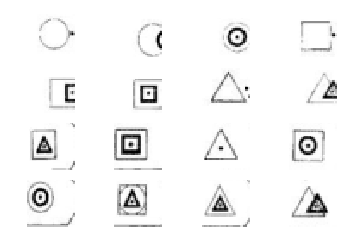

In [281]:
pic=np.zeros((28,28,16))
n=10
pic[:,:,0]=misc.imresize(np.array(a)[37-n:78-n,81-n:123-n,:], (28, 28))[:,:,0]
pic[:,:,3]=misc.imresize(np.array(a)[80-n:122-n,81-n:123-n,:], (28, 28))[:,:,0]
pic[:,:,6]=misc.imresize(np.array(a)[126-n:169-n,81-n:123-n,:], (28, 28))[:,:,0]
pic[:,:,1]=misc.imresize(np.array(a)[34-n:72-n,147-n:187-n,:], (28, 28))[:,:,0]
pic[:,:,4]=misc.imresize(np.array(a)[79-n:121-n,147-n:190-n,:], (28, 28))[:,:,0]
pic[:,:,7]=misc.imresize(np.array(a)[125-n:168-n,148-n:190-n,:], (28, 28))[:,:,0]
pic[:,:,2]=misc.imresize(np.array(a)[34-n:76-n,211-n:253-n,:], (28, 28))[:,:,0]
pic[:,:,5]=misc.imresize(np.array(a)[78-n:121-n,211-n:253-n,:], (28, 28))[:,:,0]
n=0
pic[:,:,8]=misc.imresize(np.array(a)[236:280,21:73,:], (28, 28))[:,:,0]
pic[:,:,9]=misc.imresize(np.array(a)[240:280,105:144,:], (28, 28))[:,:,0]
pic[:,:,10]=misc.imresize(np.array(a)[240-n:281-n,183-n:225-n,:], (28, 28))[:,:,0]
pic[:,:,11]=misc.imresize(np.array(a)[239-n:280-n,265-n:306-n,:], (28, 28))[:,:,0]
pic[:,:,12]=misc.imresize(np.array(a)[312-n:353-n,25-n:73-n,:], (28, 28))[:,:,0]
pic[:,:,13]=misc.imresize(np.array(a)[312-n:353-n,102-n:148-n,:], (28, 28))[:,:,0]
pic[:,:,14]=misc.imresize(np.array(a)[311-n:353-n,181-n:228-n,:], (28, 28))[:,:,0]
pic[:,:,15]=misc.imresize(np.array(a)[314-n:353-n,262-n:303-n,:], (28, 28))[:,:,0]
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(pic[:,:,i],cmap='gray')
    plt.axis('off')
np.save('pic'+N+'.npy',pic)
data[:,:,:,2]=pic

In [201]:
pic1=pic[:,:,0]

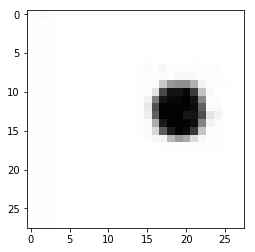

In [202]:
plt.imshow(pic1,cmap='gray')

/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


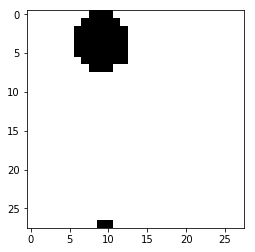

In [194]:
pic1=misc.imresize(np.array(a)[35:75,81:123,:], (28, 28))[:,:,0]
pic1[pic1<=190]=0
pic1[pic1>190]=1
plt.imshow(pic1,cmap='gray')

(32, 28)

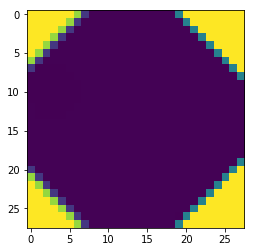

In [196]:
pic2=get_img_rot_broa(pic1, degree=45, filled_color=[255,255,255])
plt.imshow(pic2[6:34,6:34])
pic2[7:pic2.shape[0],7:35].shape

In [ ]:
#14 intermediate categories: circle, square, triangle, cross, dot, line, other shape, filled(shade), overlap, 1, 2, 3, 4, many.
def load_sample(Pic):
    data=np.zeros((128,784))
    answer=np.zeros((128,14))

In [93]:

def load_sample(Pic):
    data=np.zeros((8,784))
    answer=np.zeros((8,2))
    for i in range (0,8):
        if random.randint(0,2)==1:
            n1=random.randint(0,4)
            pic1=misc.imresize(np.array(a)[22:62,75:115,:], (28, 28))[:,:,0]
            #pic1=misc.imresize(np.array(Pic)[33+n1:73+n1,79+n2:121+n2,:], (28, 28))[:,:,0]
            m=random.randint(0,20)
            #pic1[pic1<=190+m]=0
            #pic1[pic1>190+m]=1
            #pic1=pic1/255
            alpha=random.randint(0,360)
            #n3=random.randint(0,4)
            #n4=random.randint(0,4)
            if random.randint(0,2)==1:
                pic2=get_img_rot_broa(pic1, degree=alpha, filled_color=[255,255,255])
            else:
                pic2=get_img_rot_broa(pic1[::-1], degree=alpha, filled_color=[255,255,255])
            data[i,:]=pic2[pic2.shape[0]-28:pic2.shape[0],pic2.shape[1]-28:pic2.shape[1]].reshape(1,784)/255
            if i==0:
                plt.imshow(data[i,:].reshape(28,28))
            #data[i,:]=pic2[4+n3:32+n3,4+n4:32+n4].reshape(1,784)
            answer[i,:]=[1,0]
        else:
            data[i,:]=np.random.randint(255, size=(1,784))/255
            answer[i,:]=[0,1]
    return data,answer

In [242]:
def paste_sample(a):
    data=np.ones((8,784))*255
    answer=np.zeros((8,2))
    size=random.randint(5,10)
    place1=random.randint(0,28-size)
    place2=random.randint(0,28-size)
    p=misc.imresize(np.array(a)[35:47,89:102,:], (size, size))[:,:,0]
    for i in range (0,8):
        if random.randint(0,2)==1:
            data1=np.ones((28,28))*255
            data1[place1:place1+size,place2:place2+size]=p
            data[i,:]=data1.reshape(784,)/255
            answer[i,:]=[1,0]
        else:
            data[i,:]=np.random.randint(255, size=(1,784))/255
            answer[i,:]=[0,1]
    return data,answer

In [143]:
# Training Parameters
learning_rate = 0.001
num_steps = 100
batch_size = 8
display_step = 1

# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 1+1 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

In [144]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
    # Reshape to match picture format [Height x Width x Channel]
    # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [253]:
weights['wd1'].get_shape().as_list()[0]

294

In [145]:
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 3])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 3, 6])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*6, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([3])),
    'bc2': tf.Variable(tf.random_normal([6])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Construct model
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)


# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [245]:
# weight1=np.zeros((5,5,1,3))
# weight2=np.zeros((5,5,3,6))
# acc1=0
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    batch_x1, batch_y1 = paste_sample(a)
    batch_x2, batch_y2 = paste_sample(a)
    for step in range(1, num_steps+1):
        batch_x, batch_y = paste_sample(a)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Train Accuracy= " + \
                  "{:.3f}".format(acc))
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x1,
                                                                 Y: batch_y1,
                                                                 keep_prob: 1.0})
            loss1, acc1 = sess.run([loss_op, accuracy], feed_dict={X: batch_x2,
                                                                 Y: batch_y2,
                                                                 keep_prob: 1.0})
            loss=(loss+loss1)/2
            acc=(acc+acc1)/2
            if acc>acc1:
                print('1')
                weight1=weights['wc1'].eval(sess)
                weight2=weights['wc2'].eval(sess)
                acc1=acc
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Valication Accuracy= " + \
                  "{:.3f}".format(acc))
    print("Optimization Finished!")

    #Calculate accuracy for 256 MNIST test images
    print("Testing Accuracy:", \
         sess.run(accuracy, feed_dict={X: test[0:8,:],
                                       Y: answer_test[0:8],
                                       keep_prob: 1.0}))



/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys


Step 1, Minibatch Loss= 90.3232, Train Accuracy= 0.875
1
Step 1, Minibatch Loss= 237.1129, Valication Accuracy= 0.688
Step 10, Minibatch Loss= 326.3129, Train Accuracy= 0.750
Step 10, Minibatch Loss= 442.3851, Valication Accuracy= 0.750
Step 20, Minibatch Loss= 0.0000, Train Accuracy= 1.000
1
Step 20, Minibatch Loss= 221.3159, Valication Accuracy= 0.875
Step 30, Minibatch Loss= 0.0000, Train Accuracy= 1.000
1
Step 30, Minibatch Loss= 75.6306, Valication Accuracy= 0.875
Step 40, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 40, Minibatch Loss= 0.0000, Valication Accuracy= 1.000
Step 50, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 50, Minibatch Loss= 0.0000, Valication Accuracy= 1.000
Step 60, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 60, Minibatch Loss= 0.0000, Valication Accuracy= 1.000
Step 70, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 70, Minibatch Loss= 0.0000, Valication Accuracy= 1.000
Step 80, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 80, Mi

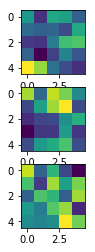

In [160]:
for i in range (0,3):
    plt.subplot(3,1,i+1)
    plt.imshow(weight[:,:,0,i])

In [165]:
test.shape

(16, 784)

In [800]:
plt.imshow(test[0,:].reshape(28,28))

NameError: name 'test' is not defined

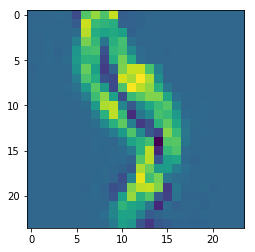

In [174]:
from scipy.signal import convolve2d
I=convolve2d(test[0,:].reshape(28,28),weight[:,:,0,2],'valid')
plt.imshow(I)

In [175]:
np.save('weight1.npy',weight)
np.save('weight2.npy',weight2)

In [ ]:
    # Calculate accuracy for 256 MNIST test images
#     print("Testing Accuracy:", \
#         sess.run(accuracy, feed_dict={X: mnist.test.images[:256],
#                                       Y: mnist.test.labels[:256],
#                                       keep_prob: 1.0}))

In [28]:
pic.shape

(28, 28, 16)

In [45]:

test=np.zeros((128,784))
answer_test=np.zeros((128,2))
for i in range (0,8):
    for k in range(0,16):
        test[i*16+k,:]=pic[:,:,k].reshape(784,)/255
        answer_test[i*16+k,:]=[1,0]

In [235]:
test=np.zeros((16,784))
for k in range(0,16):
        test[k,:]=pic[:,:,k].reshape(784,)/255

In [237]:
test

array([[0.99607843, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.99607843, 0.99215686,
        0.98823529],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [90]:
pic_s=np.load('pic_s.npy')
test1=np.zeros((24,784))
for k in range(0,24):
        test1[k,:]=pic_s[:,:,k].reshape(784,)/255

In [60]:
np.save('test.npy',test)

In [36]:
test.shape

(128, 784)

In [131]:
 #Calculate accuracy for 256 MNIST test images
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: test1[8:16,:],
                                    Y: answer[0:8],
                                    keep_prob: 1.0}))

Testing Accuracy: 0.0


In [133]:
 #Calculate accuracy for 256 MNIST test images
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: test[0:8,:],
                                    Y: answer[0:8,:],
                                    keep_prob: 1.0}))

Testing Accuracy: 0.25


In [64]:
tf.all_variables()[23]

<tf.Variable 'Variable_6/Adam_1:0' shape=(1024,) dtype=float32_ref>

In [246]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    weight11=weights['wc1'].eval(sess)
    weight22=weights['wc2'].eval(sess)

In [248]:
weight1=np.load('weight1.npy')
weight1.shape

(5, 5, 1, 3)

In [251]:
weight=np.zeros((5,5,1,3,2))
weight[:,:,:,:,0]=weight1
weight[:,:,:,:,1]=weight11
weightt=np.zeros((5,5,3,6,2))
weightt[:,:,:,:,0]=weight2
weightt[:,:,:,:,1]=weight22
np.save('weight1.npy',weight)
np.save('weight2.npy',weightt)

In [152]:
weight.shape


(5, 5, 1, 3)

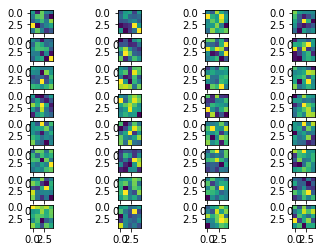

In [83]:
for i in range (0,32):
    plt.subplot(8,4,i+1)
    plt.imshow(weight[:,:,0,i])

In [51]:
import scipy.misc 
pic1=misc.imresize(np.array(a)[35:75,81:123,:], (28, 28))[:,:,0]
scipy.misc.imsave('shape.jpg', pic1)

/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  
/Users/sofiadunlosky/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
a=Image.open('/Users/sofiadunlosky/Downloads/ilovepdf_images-extracted/img'+N+'.jpg')

TypeError: unhashable type: 'numpy.ndarray'

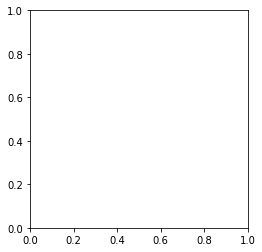

In [167]:
plt.imshow(test[0,:].reshape(28,28),weight[:,:,0,i])

In [252]:
batch_x[2,:].reshape(28,28)

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.    

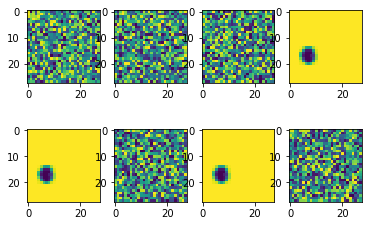

In [244]:
batch_x.shape
for i in range(0,8):
    plt.subplot(2,4,i+1)
    plt.imshow(batch_x[i,:].reshape(28,28))